# Assignment 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [2]:
df = pd.read_csv("transfusion.data")

print(df.shape)
df.head()

(748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [3]:
df.columns = ['Recency', 'Frequency', 'Volume', 'Time', 'Target']
df.head()

,Recency,Frequency,Volume,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

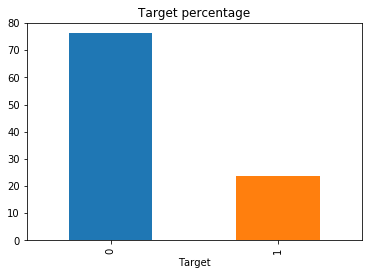

In [4]:
(100 * df.groupby('Target').size() / df.shape[0]).plot(kind="bar", title="Target percentage")


In [5]:
print('If predictions always equal 0, the accuracy would be', 
     round((100 * df.groupby('Target').size() / df.shape[0])[0], 2), '%')

If predictions always equal 0, the accuracy would be 76.2 %


3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

In [6]:
print(df.corr())

            Recency  Frequency    Volume      Time    Target
Recency    1.000000  -0.182745 -0.182745  0.160618 -0.279869
Frequency -0.182745   1.000000  1.000000  0.634940  0.218633
Volume    -0.182745   1.000000  1.000000  0.634940  0.218633
Time       0.160618   0.634940  0.634940  1.000000 -0.035854
Target    -0.279869   0.218633  0.218633 -0.035854  1.000000


3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

The two most correlated variables are Frequency and Volume.


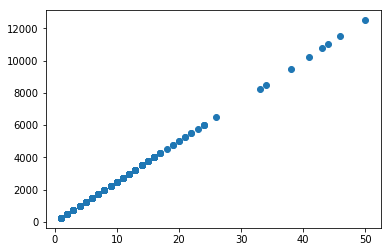

In [7]:
print('The two most correlated variables are Frequency and Volume.')
plt.scatter(df['Frequency'], df['Volume'])
plt.show()

In [8]:
# We see a clear line, the quantity of blood given each time is the slope of this line
# We can find it easily: 
print('Usual blood quatity = {} cm3'.format(df['Volume'][10] / df['Frequency'][10]))

Usual blood quatity = 250.0 cm3


3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

In [9]:
df.drop(columns='Volume', inplace=True)

## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [10]:
y = df['Target']
X = df.drop(columns='Target')


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf_log = LogisticRegression(random_state=1)

scores_log = cross_val_score(clf_log, X, y, scoring='r2', cv=5)

print('cross validation r2 =', scores_log.mean())

cross validation r2 = -0.21582289055973272


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=100)
scores_rf = cross_val_score(clf_rf, X, y, scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_rf.mean())

cross validation accuracy = 0.7646890380313198


6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [13]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf': [1, 4, 7],
          'min_samples_split': [2, 4, 6, 8, 10],
          'n_estimators': [20, 30, 40]}

clf_rf2 = RandomForestClassifier(random_state=1)

clf_gs = GridSearchCV(clf_rf2, params, scoring='accuracy', cv=5)
clf_gs.fit(X, y)

C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [1, 4, 7], 'min_samples_split': [2, 4, 6, 8, 10], 'n_estimators': [20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

7- Print the best score, and the best parameters

In [14]:
print(clf_gs.best_score_)

0.7459893048128342


In [15]:
print(clf_gs.best_params_)

{'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 30}


8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [16]:
clf_rf.fit(X, y)
importance_df = pd.DataFrame(clf_rf.feature_importances_, X.columns, columns=['Importance'])
importance_df.sort_values('Importance', ascending=False)

,Importance
Recency,0.421344
Frequency,0.368498
Time,0.210158


9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [17]:
# Add a new column contianing the number of donations per months
df['Don_Per_Month'] = (df['Frequency'] / df['Time']) * 12

df = pd.get_dummies(df, columns=['Recency'])
y = df['Target']
X = df.drop(columns='Target')

clf_rf2 = RandomForestClassifier(random_state=1)

clf_gs = GridSearchCV(clf_rf2, params, scoring='accuracy', cv=5)
clf_gs.fit(X, y)

print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.7633689839572193
{'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 20}


C:\Users\maxim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

In [18]:
def do_grid_search(X, y, clf, params):
    clf_gs = GridSearchCV(clf, params, scoring='accuracy', cv=5)
    clf_gs.fit(X, y)

    print(clf_gs.best_score_)
    print(clf_gs.best_params_)

from sklearn.ensemble import AdaBoostClassifier

print('\nAdaBoost Classifier:')
clf_ada = AdaBoostClassifier(random_state=1)

params = { 'n_estimators': [5, 10, 15, 20, 30],
           'learning_rate': [0.001, 0.0001, 0.0005] }

do_grid_search(X, y, clf_ada, params)

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

print('\nBagging Classifier:')

params = { 'max_samples': [0.1, 0.2, 0.5, 0.7],
           'max_features': [0.1, 0.2, 0.5, 0.7] }

clf_bag = BaggingClassifier(KNeighborsClassifier())

do_grid_search(X, y, clf_bag, params)


AdaBoost Classifier:
0.7620320855614974
{'learning_rate': 0.001, 'n_estimators': 5}

Bagging Classifier:
0.7633689839572193
{'max_features': 0.2, 'max_samples': 0.1}
